In [15]:
#Importing the Important Libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [16]:
df = pd.read_csv('insurance.csv')


In [17]:
from sklearn.model_selection import train_test_split

df.shape


(1338, 7)

In [18]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [19]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


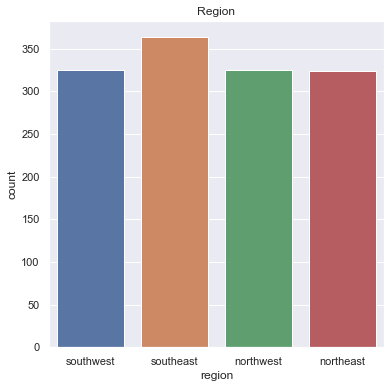

In [20]:
#Region column
plt.figure(figsize=(6,6))
sns.countplot(x = 'region', data = df)
plt.title('Region')
plt.show()

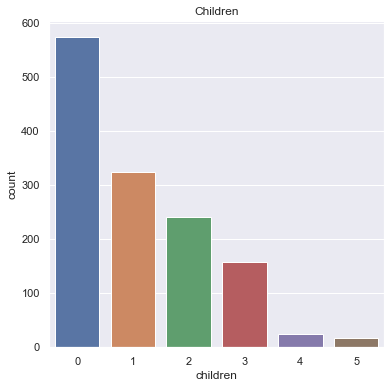

In [21]:
#Childern column count plot
plt.figure(figsize=(6,6))
sns.countplot(x = 'children', data = df)
plt.title('Children')
plt.show()

C:\Users\RUSHIKESH\anaconda3\envs\ML Project\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


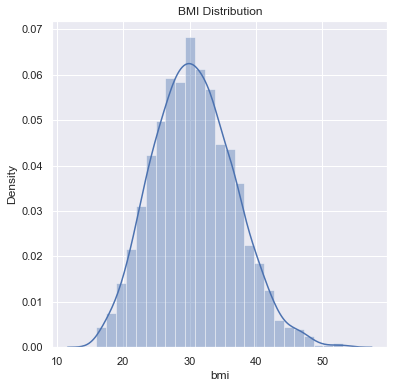

In [22]:
#Distribution of the bmi value distribution plot

plt.figure(figsize=(6,6))
sns.distplot(df['bmi']) 
plt.title('BMI Distribution')
plt.show()

<Figure size 432x432 with 0 Axes>

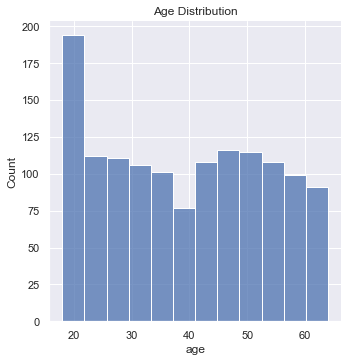

In [23]:
#Distribution of the age value 
sns.set() 
plt.figure(figsize=(6,6))
sns.displot(df['age']) 
plt.title('Age Distribution')
plt.show()

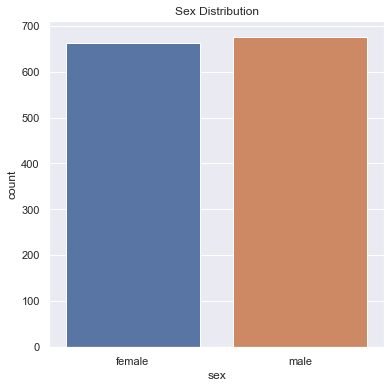

In [24]:
#Gender column (catagorical) count plot
plt.figure(figsize=(6,6))
sns.countplot(x = 'sex' , data=df)
plt.title('Sex Distribution')
plt.show()

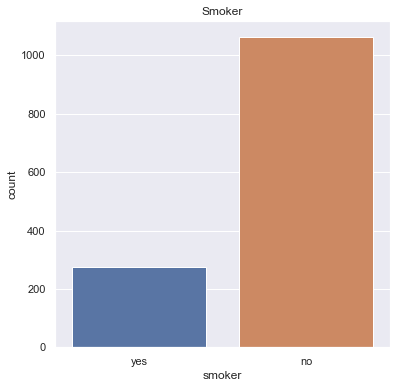

In [25]:
#Smoker Column count plot
plt.figure(figsize=(6,6))
sns.countplot(x = 'smoker', data = df)
plt.title('Smoker')
plt.show()

In [26]:
#Encoding the Sex Column
df.replace({'sex':{'male': 0, 'female': 1}}, inplace=True)

#Encoding the Smoker Column
df.replace({'smoker':{'yes': 0, 'no': 1}}, inplace=True)

#Encoding the Region Column
df.replace({'region':{'southeast': 0, 'southwest': 1, 'northeast':2, 'northwest':3}}, inplace = True)

In [27]:
features = ['age','sex','bmi','smoker','region']

x=df.loc[:, features].values

y= df.loc[:,['charges']].values

x=StandardScaler().fit_transform(x)

In [28]:
pca= PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf= pd.DataFrame(data= principalComponents,columns=['principal component 1','principal component 2'])

In [29]:
finalDf= pd.concat([principalDf ,df[['charges']]],axis =1)

In [30]:
print(finalDf)

      principal component 1  principal component 2      charges
0                 -0.236985               1.478261  16884.92400
1                  0.945229               0.969146   1725.55230
2                  1.015041               0.634109   4449.46200
3                 -1.797339               0.614081  21984.47061
4                 -1.113427               0.487189   3866.85520
...                     ...                    ...          ...
1333              -0.593941              -0.207307  10600.54830
1334              -0.752018              -0.196019   2205.98080
1335               0.956209              -0.250245   1629.83350
1336              -0.823456              -0.103907   2007.94500
1337              -0.594477              -0.120181  29141.36030

[1338 rows x 3 columns]


In [31]:
from sklearn.model_selection import train_test_split

# Split the dataset to training and testing
train, test = train_test_split(df, test_size=0.2)

# Split the feature and the target
train_y = train.charges.values
train_x = train.drop(columns=['charges']).values
test_y = test.charges.values
test_x = test.drop(columns=['charges']).values

# See the size of training and testing
print('Training features : ', train_x.shape)
print('Training target : ', train_y.shape)
print('Testing features : ', test_x.shape)
print('Testing target : ', test_y.shape)

Training features :  (1070, 6)
Training target :  (1070,)
Testing features :  (268, 6)
Testing target :  (268,)


In [172]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit on training set only.
scaler.fit(train_x)

# Apply transform to both the training set and the test set.
train_x = scaler.transform(train_x)
test_x = scaler.transform(test_x)

In [173]:
pca = PCA(.95)


In [174]:
from sklearn.decomposition import PCA
pca.fit(train_x)
pca.fit(test_x)

train_x = pca.transform(train_x)
test_x = pca.transform(test_x)


In [175]:
from sklearn.linear_model import LinearRegression
linRegr = LinearRegression()

In [176]:
linRegr.fit(train_x, train_y)

LinearRegression()

In [177]:
training_data_prediction=linRegr.predict(test_x)

In [178]:
#R squared value of train data.
from sklearn.metrics import mean_squared_error, r2_score
import math
r2_train = metrics.r2_score(test_y, training_data_prediction)
print("R squared value is: ", r2_train)


rf_mse = mean_squared_error(test_y, training_data_prediction)
print('MSE-Linear Regression : %.2f (square-rooted)' % math.sqrt(rf_mse))

R squared value is:  0.7433523978431212
MSE-Linear Regression : 6579.70 (square-rooted)


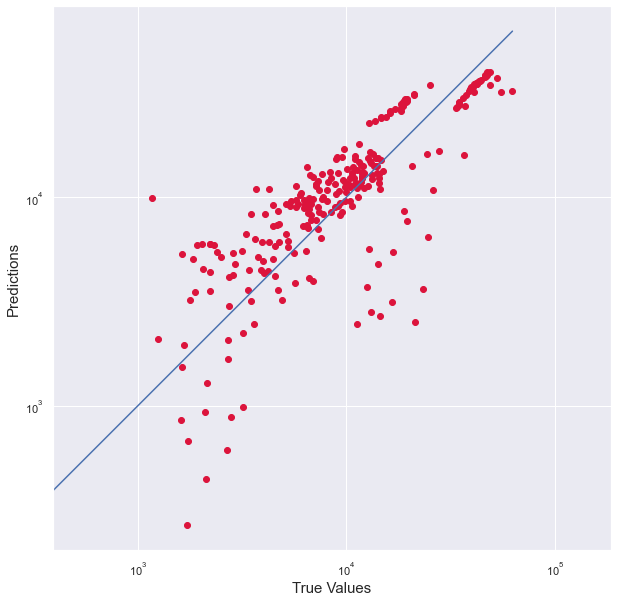

In [56]:
plt.figure(figsize=(10,10))
plt.scatter(test_y, training_data_prediction, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(test_y), max(test_y))
p2 = min(min(training_data_prediction), min(test_y))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()